## Model for Suburb Future Rental Cost Estimation
##### Overall Approach
1. Fit Multiple linear regression model
2. Predict next three year rental price, and find top ten suburbs
3. Model Evaluation

In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

pd.options.mode.chained_assignment = None


In [19]:
suburb = pd.read_csv('../data/curated/suburb_final.csv')
suburb_2023 = pd.read_csv('../data/curated/suburb_2023.csv')
suburb_2024 = pd.read_csv('../data/curated/suburb_2024.csv')
suburb_2025  = pd.read_csv('../data/curated/suburb_2025.csv')

In [20]:
suburb = suburb.fillna(0)
suburb['income'] = suburb['2022_income'] # change the index of income in 2022

#### Fit Multiple linear regression model and Predict next three year rental price
The parameters of the multiple linear regression model were solved by using rental price as the dependent variable, population_density, offence_count_scaled, income, LOC_NAME, num_stations, num_schools and num_hospital as independent variables based on the statsmodels module. Set LOC_NAME in C() to indicate that it is treated as a Category variable.

In [17]:
from sklearn import model_selection
import statsmodels.api as sm
model_sub = sm.formula.ols('rental_price ~ population_density + offence_count_scaled + income + num_stations + num_schools + num_hospitals + C(LOC_NAME)', data=suburb).fit()
print('The partial regression coefficients of the models were: \n', model_sub.params)

sub_2023 = suburb_2023.drop(labels='rental_price', axis=1)
sub_2024 = suburb_2024.drop(labels='rental_price', axis=1)
sub_2025 = suburb_2025.drop(labels='rental_price', axis=1)
pre2023 = model_sub.predict(exog=sub_2023)
pre2024 = model_sub.predict(exog=sub_2024)
pre2025 = model_sub.predict(exog=sub_2025)
price_pred_sub = pd.DataFrame({'Suburb': suburb.LOC_NAME, 'Rental_price_now': suburb.rental_price,'Prediction_2023': pre2023, 'Prediction_2024': pre2024, 'Prediction_2025': pre2025})


The partial regression coefficients of the models were: 
 Intercept                      365.685372
C(LOC_NAME)[T.Aberfeldie]      -73.142516
C(LOC_NAME)[T.Aintree]         -88.744580
C(LOC_NAME)[T.Airport West]   -126.939241
C(LOC_NAME)[T.Albanvale]      -148.759288
                                  ...    
offence_count_scaled          -140.759653
income                           0.003363
num_stations                     0.223701
num_schools                    -11.878050
num_hospitals                   12.448423
Length: 730, dtype: float64


avg_growth_rate is obtained by calculating the average growth rate of the rental price over four years (2022, projected 2023, 2024 and 2025).

In [21]:
growth_2023 = (price_pred_sub.Prediction_2023 - price_pred_sub.Rental_price_now) / price_pred_sub.Rental_price_now
growth_2024 = (price_pred_sub.Prediction_2024 - price_pred_sub.Prediction_2023) / price_pred_sub.Prediction_2023
growth_2025 = (price_pred_sub.Prediction_2025 - price_pred_sub.Prediction_2024) / price_pred_sub.Prediction_2024
price_pred_sub['avg_growth_rate'] = (growth_2023 + growth_2024 + growth_2025) /3 

In [22]:
price_pred_sub

,Suburb,Rental_price_now,Prediction_2023,Prediction_2024,Prediction_2025,avg_growth_rate
0,Korumburra,278.333333,282.469445,286.713565,291.068514,0.015025
1,Kew,621.281250,627.365735,633.605052,640.003139,0.009946
2,Glen Waverley,561.269841,563.602280,565.972562,568.381324,0.004206
3,Sailors Falls,450.000000,454.912688,459.980594,465.208622,0.011141
4,Sunbury,471.617647,477.787779,484.138792,490.675991,0.013293
...,...,...,...,...,...,...
719,Montmorency,525.555556,532.724947,540.124809,547.762552,0.013891
720,Carrum Downs,458.823529,465.063869,471.498317,478.132911,0.013836
721,Mambourin,407.352941,412.405000,417.584212,422.893776,0.012559
722,Murtoa,300.000000,305.420549,311.015143,316.789368,0.018317


In [23]:
price_pred_sub.to_csv('../data/curated/suburb_rental_price_prediction.csv')

Find the top 10 suburbs with the highest predicted growth rate:

In [24]:
top10_2022 = price_pred_sub.sort_values(['Rental_price_now'],ascending=False).head(10)[['Suburb','Rental_price_now']]
top10_2023 = price_pred_sub.sort_values(['Prediction_2023'],ascending=False).head(10)[['Suburb','Prediction_2023']]
top10_2024 = price_pred_sub.sort_values(['Prediction_2024'],ascending=False).head(10)[['Suburb','Prediction_2024']]
top10_2025 = price_pred_sub.sort_values(['Prediction_2025'],ascending=False).head(10)[['Suburb','Prediction_2025']]
top10_rate = price_pred_sub.sort_values(['avg_growth_rate'],ascending=False).head(10)

In [25]:
top10_2022.index = range(1,len(top10_2022) + 1)

In [26]:
top10_2023.index = range(1,len(top10_2023) + 1)

In [27]:
top10_2024.index = range(1,len(top10_2024) + 1)

In [28]:
top10_2025.index = range(1,len(top10_2025) + 1)

In [29]:
top10_rate.index = range(1,len(top10_rate) + 1)

In [30]:
Top10 = pd.DataFrame({'Suburbs with highest rental price in 2022': top10_2022.Suburb,
                      'Suburbs with highest rental price in 2023': top10_2023.Suburb,
                      'Suburbs with highest rental price in 2024': top10_2024.Suburb, 
                      'Suburbs with highest rental price in 2025': top10_2025.Suburb,
                      'highest rental price in 2025': top10_2025.Prediction_2025,
                      'Suburbs with highest average growth rate': top10_rate.Suburb,
                      'Price of top10 suburbs with highest average growth rate in 2025': top10_rate.Prediction_2025,})

In [31]:
Top10

,Suburbs with highest rental price in 2022,Suburbs with highest rental price in 2023,Suburbs with highest rental price in 2024,Suburbs with highest rental price in 2025,highest rental price in 2025,Suburbs with highest average growth rate,Price of top10 suburbs with highest average growth rate in 2025
1,Skenes Creek,Skenes Creek,Skenes Creek,Skenes Creek,3859.678643,Allansford,53.176493
2,Merriang,Merriang,Merriang,Merriang,2813.342539,Kadnook,262.907710
3,Flinders,Flinders,Flinders,Flinders,2440.555131,Natimuk,224.353696
4,Seaspray,Seaspray,Seaspray,Seaspray,2261.620112,Nichols Point,217.673030
5,Marengo,Marengo,Marengo,Marengo,2109.678643,Bundalong,194.862572
6,Balnarring Beach,Balnarring Beach,Balnarring Beach,Balnarring Beach,2012.580029,Nhill,276.576686
7,Myrtleford,Myrtleford,Myrtleford,Myrtleford,1801.913968,Pyramid Hill,276.407630
8,Apollo Bay,Apollo Bay,Apollo Bay,Apollo Bay,1667.178643,South Kingsville,410.423363
9,Indented Head,Indented Head,Indented Head,Indented Head,1603.340529,Penshurst,250.292959
10,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,Cape Bridgewater,1557.551956,Boort,328.074297


In [32]:
Top10.to_csv('../data/curated/top_10_suburbs.csv')

### Model Evaluation
 We used a multiple linear regression model to predict the rental price, but we also need to evaluate whether this model meets the premise assumptions of the linear regression model.

#### Normality test

1.  KDE curve and fitted curve have similar trend

    From the figure, the trend of the kernel density curve and the normal density curve are more consistent, so it is intuitively assumed that the rental price variable obeys the normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


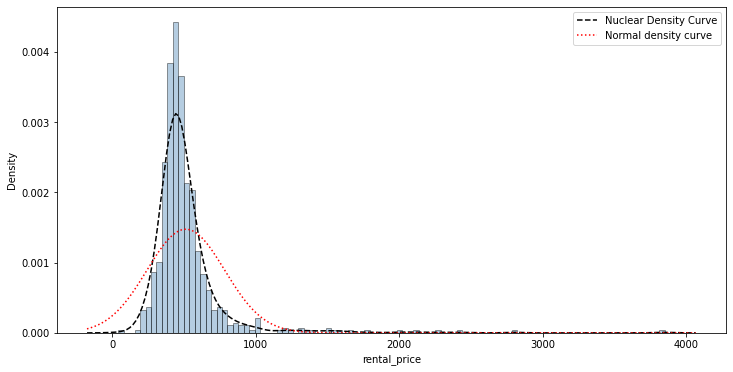

In [34]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.distplot(a=suburb.rental_price, bins=100, fit=stats.norm, norm_hist=True,
             hist_kws={'color':'steelblue', 'edgecolor':'black'},
             kde_kws={'color':'black', 'linestyle':'--', 'label':'Nuclear Density Curve'},
             fit_kws={'color':'red', 'linestyle':':', 'label':'Normal density curve'})

plt.legend()
plt.savefig("../plots/model_normality_hist.jpeg")
plt.show()

2. Q-Q plot & P-P plot

   From the figures, it can be seen that the plotted to scatter points all fall in the vicinity of the straight line, except for the tail, which has no significant deviation, so the rental price variable is considered to approximately obey the normal distribution.

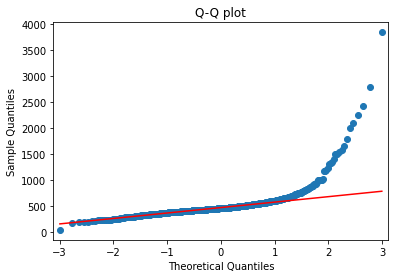

In [35]:
import statsmodels.api as sm

pp_qq_plot = sm.ProbPlot(suburb.rental_price)


pp_qq_plot.qqplot(line='q')
plt.title('Q-Q plot')

plt.savefig("../plots/model_normality_QQ.jpeg")
plt.show()


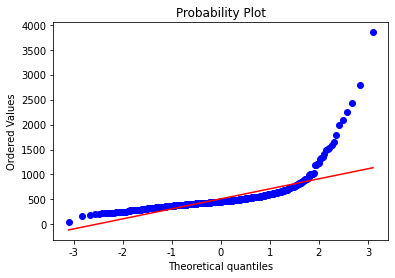

In [36]:
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False

stats.probplot(suburb.rental_price, dist=stats.norm, sparams=(0,1), plot=plt)
plt.show()


3. Shapiro test

    Since the p-value is greater than the confidence level of 0.05, the original hypothesis that the rental price variable obeys a normal distribution is accepted.

In [37]:
import scipy.stats as stats

Shapiro_test = stats.shapiro(suburb.rental_price)
print(Shapiro_test)

ShapiroResult(statistic=0.5534712076187134, pvalue=2.6595551840082855e-39)


#### Multicollinearity test

The test of multicollinearity can be identified by using the variance inflation factor VIF, if VIF is greater than 10, 
it means that there is multicollinearity among variables; if VIF is greater than 100, it means that there is serious
multicollinearity among variables.

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(suburb.loc[:,['population_density' , 'offence_count_scaled' , 'income',  'num_stations' , 'num_schools','num_hospitals']])

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF Faxtor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


               features  VIF Faxtor
0                 const   49.244296
1    population_density    1.272901
2  offence_count_scaled    1.061638
3                income    1.244803
4          num_stations    1.440025
5           num_schools    1.426550
6         num_hospitals    1.342956


In [39]:
model_sub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           rental_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                nan
Time:                        18:27:33   Log-Likelihood:                 11468.
No. Observations:                 724   AIC:                        -2.149e+04
Df Residuals:                       0   BIC:                        -1.817e+04
Df Model:                         723                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             365.6854        inf          0        nan         nan         nan
C(LOC_NAME)[T.Aberfeldie]             -73.1425        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Aintree]                -88.7446        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Airport West]          -126.9392        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Albanvale]             -148.7593        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Albert Park]            282.7575        inf          0        nan         nan         nan
C(LOC_NAME)[T.Albion]                -116.3971        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Alexandra]             -113.0515        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Alfredton]             -119.2903        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Allansford]            -469.1779        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Alphington]             -36.5754        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Altona]                -117.3846        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Altona Meadows]        -143.0921        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Altona North]           -28.3031        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Anakie]                 298.0467        inf          0        nan         nan         nan
C(LOC_NAME)[T.Anglesea]               269.2908        inf          0        nan         nan         nan
C(LOC_NAME)[T.Apollo Bay]            1185.2246        inf          0        nan         nan         nan
C(LOC_NAME)[T.Ararat]                -128.1285        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Ardeer]                 -97.7717        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Armadale]                93.9309        inf          0        nan         nan         nan
C(LOC_NAME)[T.Armstrong Creek]        -25.2980        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Arthurs Seat]           486.3436        inf          0        nan         nan         nan
C(LOC_NAME)[T.Ascot]                  -67.3742        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Ascot Vale]              -3.6091        inf         -0        nan         nan         nan
C(LOC_NAME)[T.Ashburton]               52.0704        inf          0        nan         nan         nan
C(LOC_NAME)[T.Ashwood]                 68.8522        inf          0        nan         nan         nan
C(LOC_NAME)[T.Aspendale]              300.7094        inf          